In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [209]:
import pandas as pd
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
Triathlon= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Triathlon")
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
AllAthletes=pd.read_excel("AllAthletesData.xlsx")
Athletes.head()

C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez
1,2,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds
2,3,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper
3,4,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez
4,5,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson


In [211]:
df_excersizetype['HR']=60/(df_excersizetype['RR']/1000)
df_excersizetype
df_excersizetype.loc[df_excersizetype['HR'] < 100,'Zone Type']='Zone 1'
df_excersizetype.loc[(df_excersizetype['HR'].between(100,120)), 'Zone Type'] = 'Zone 2'
df_excersizetype.loc[(df_excersizetype['HR'].between(121,135)), 'Zone Type'] = 'Zone 3'
df_excersizetype.loc[(df_excersizetype['HR'].between(136,155)), 'Zone Type'] = 'Zone 4'
df_excersizetype.loc[df_excersizetype['HR'] > 155, 'Zone Type'] = 'Zone 5'
df_excersizetype

,ID,time,RR,VO2,power,ExType,HR,Zone Type
0,1,-130.840,672.0,0.302008,0,Warm Up,89.285714,Zone 1
1,1,-130.168,672.0,0.302008,0,Warm Up,89.285714,Zone 1
2,1,-129.536,632.0,0.301336,0,Warm Up,94.936709,Zone 1
3,1,-128.824,712.0,0.301336,0,Warm Up,84.269663,Zone 1
4,1,-127.948,876.0,0.301336,0,Warm Up,68.493151,Zone 1
...,...,...,...,...,...,...,...,...
52057,18,947.288,536.0,0.507071,0,Cool Down,111.940299,Zone 2
52058,18,947.816,528.0,0.507071,0,Cool Down,113.636364,Zone 2
52059,18,948.344,528.0,0.507071,0,Cool Down,113.636364,Zone 2
52060,18,948.884,540.0,0.507071,0,Cool Down,111.111111,Zone 2


Q1 Join all sport-related tables to produce one dataframe that has all athletes values. 
The final table should only have the same 5 columns: ID, time,power,RR, vo2, power.
Write this dataframe to an excel file.


In [95]:
dataframe=pd.concat([Kayaking,Triathlon,Fencing])
dataframe                    

,ID,time,RR,VO2,power
0,11,-168.600,727.0,0.287147,0
1,11,-167.872,728.0,0.287147,0
2,11,-167.148,724.0,0.287147,0
3,11,-166.484,664.0,0.320580,0
4,11,-165.836,648.0,0.320580,0
...,...,...,...,...,...
27598,10,942.700,428.0,0.786363,0
27599,10,943.124,424.0,0.786363,0
27600,10,943.552,428.0,0.786363,0
27601,10,943.976,424.0,0.786363,0


In [96]:
df_excersizetype=pd.read_excel('AllAthletesData.xlsx',sheet_name='AllAthletesData')
df_excersizetype.loc[df_excersizetype['time'] < 0,'ExType']='Warm Up' 
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] > 0), 'ExType'] = 'GET'
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] == 0), 'ExType'] = 'Cool Down'
df_excersizetype

,ID,time,RR,VO2,power,ExType
0,1,-130.840,672.0,0.302008,0,Warm Up
1,1,-130.168,672.0,0.302008,0,Warm Up
2,1,-129.536,632.0,0.301336,0,Warm Up
3,1,-128.824,712.0,0.301336,0,Warm Up
4,1,-127.948,876.0,0.301336,0,Warm Up
...,...,...,...,...,...,...
52057,18,947.288,536.0,0.507071,0,Cool Down
52058,18,947.816,528.0,0.507071,0,Cool Down
52059,18,948.344,528.0,0.507071,0,Cool Down
52060,18,948.884,540.0,0.507071,0,Cool Down


Q49 Retrieve the row with minimum IBI for fencing athletes using sorting technique.

In [102]:
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Fencing_df=Fencing.sort_values('RR')
min_ibirow=round(Fencing_df.iloc[0],2)
print(min_ibirow)

ID         7.00
time     596.37
RR       252.00
VO2        1.29
power    155.00
Name: 19582, dtype: float64


C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Q50 Create a violin chart using any 2 columns in the dataset

C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


<Axes: xlabel='Gender', ylabel='age'>

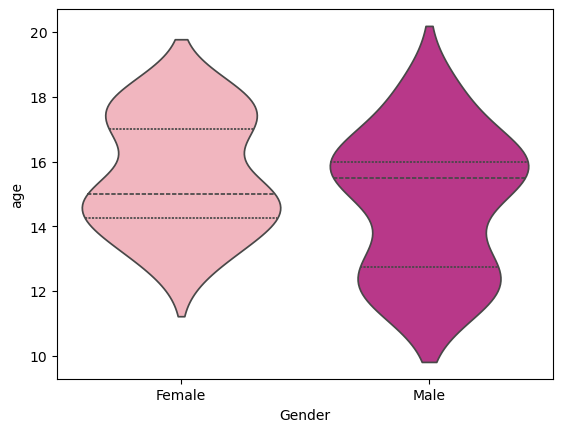

In [104]:
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
sns.violinplot(x='Gender',y='age',data= Athletes,inner='quartile',bw=0.5,hue='Gender',palette='RdPu')


Q51 List every athlete’s V02 ml/kg

In [127]:
df_VO2=AllAthletes[['ID','VO2']].groupby(by='ID').sum().reset_index()
df_VO2=df_VO2.merge(Athletes[['ID','First Name','Last Name','Weight','Height']],on='ID')
df_VO2['VO2'] /= df_VO2['Weight']
for index, data in df_VO2.iterrows():
    print(f"{data['Last Name']},{data['First Name']} has {round(data['VO2'],2)} VO2 ml/kg")

Martinez,Olivia has 42.81 VO2 ml/kg
Reynolds,Ethan has 38.63 VO2 ml/kg
Harper,Jackson has 69.71 VO2 ml/kg
Sanchez,Liam has 76.99 VO2 ml/kg
Thompson,Ava has 86.74 VO2 ml/kg
Rodriguez,Sophia has 71.68 VO2 ml/kg
Simmons,Grace has 38.4 VO2 ml/kg
Bennett,Aiden has 44.82 VO2 ml/kg
Price,Chloe has 49.7 VO2 ml/kg
Jordan,Lily has 55.12 VO2 ml/kg
Griffin,Isabella has 89.59 VO2 ml/kg
Dixon,Caleb has 92.26 VO2 ml/kg
Carpenter,Mia has 90.76 VO2 ml/kg
Mitchell,Harper has 54.87 VO2 ml/kg
Wallace,Mason has 66.94 VO2 ml/kg
Anderson,Logan has 69.66 VO2 ml/kg
Foster,Lucas has 73.79 VO2 ml/kg
Myers,Owen has 81.21 VO2 ml/kg


Q52 Using all markers of fitness available to you, who is fittest athlete. Write 1-2 lines about the analysis that led to your insight.

In [129]:
#Higher VO2 max
df_VO2['BMI'] = df_VO2['Weight']/((df_VO2['Height']/100)**2)
df_fit = df_VO2[(df_VO2['BMI']<25) & (df_VO2['BMI']>19)]
id = df_fit['VO2'].idxmax()
print(f"The fittest athlete is {df_fit['Last Name'][id]}, {df_fit['First Name'][id]} as her BMI is in the fit Range and her VO2 ml/kg is the highest")


The fittest athlete is Thompson, Ava as her BMI is in the fit Range and her VO2 ml/kg is the highest


Q53 phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Jill

In [41]:
phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}
Jill_phno=phonebook["Jill"]
print("Jill's phone number is",Jill_phno)


Jill's phone number is 947662781


Q54 Create a Pie chart for  Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID

<Figure size 800x800 with 0 Axes>

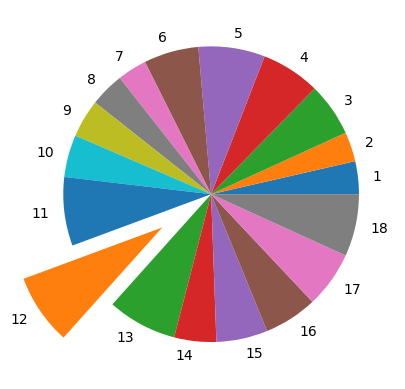

In [75]:
plt.figure(figsize=(8,8))
fig, ax = plt.subplots()
explode = df_VO2['VO2'].apply(lambda x: 0.4 if x==max(df_VO2['VO2']) else 0)
ax.pie(df_VO2['VO2'], labels=df_VO2.ID, explode=explode)
plt.show()


Q55 Using a for loop iterate through HR for all trathletes and display all details of the athlete with the highest heart rate

In [119]:
Triathlon['HR'] = 60/(Triathlon['RR']/100)
id = Triathlon['ID'][Triathlon['HR'].idxmax()]
Athletes[Athletes['ID']==id]


,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name
17,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers


Q56 Display a histogram to show distribution of athletes by sport.

C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Text(0, 0.5, 'Frequency')

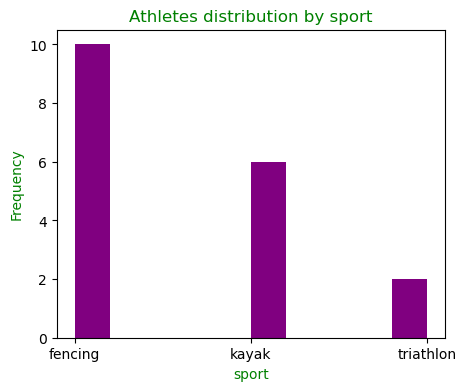

In [47]:
plt.figure(figsize=(5,4))
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
Athletes['sport'].hist(color='purple',grid= False)

#add labels and title
plt.title('Athletes distribution by sport',fontsize=12,color='green')
plt.xlabel('sport',fontsize=10,color='green')
plt.ylabel('Frequency',fontsize=10,color='green')




Q57 get the first letter of last name of students using for loops and RegEX

In [49]:
for i in Athletes['Last Name']:
    print(re.search('^.',i).group())
    

M
R
H
S
T
R
S
B
P
J
G
D
C
M
W
A
F
M


Q58 What is the average % difference in heart rate between warm up and GET for all athletes?

In [131]:
dataframe['HR']=60/(dataframe['RR']/100)
df_warmup = dataframe[dataframe['time']<0]
df_get = dataframe[dataframe['time']>0]
df_get = df_get[df_get['power']!=0]
hr_warmup = df_warmup['HR'].mean()
hr_get = df_get['HR'].mean()
avg_pct_dif = 200*(hr_get-hr_warmup)/(hr_warmup+hr_get)
print('The average % difference in heart rate between warm up and GET for all athletes is:',round(avg_pct_dif,2))

The average % difference in heart rate between warm up and GET for all athletes is: 61.06


Q59 Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

In [55]:
tallest_athlete= Athletes.iloc[Athletes['Height'].idxmax()]
print(f"""{tallest_athlete['Last Name']},{tallest_athlete['First Name']} is the tallest Athlete.
His sport is {tallest_athlete['sport']} and his VO2 ml/kg is {round(df_VO2[df_VO2['ID']==tallest_athlete['ID']]['VO2'].values[0])}""")

Harper,Jackson is the tallest Athlete.
His sport is fencing and his VO2 ml/kg is 70


Q60 get the last letter      of athletes last names using RegEX

In [57]:
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
text_column=Athletes['Last Name']
last_letter= text_column.str.extract(r'(\w)$')
print(last_letter)

    0
0   z
1   s
2   r
3   z
4   n
5   z
6   s
7   t
8   e
9   n
10  n
11  n
12  r
13  l
14  e
15  n
16  r
17  s


C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Q61 Reverse an arrays order in Python. You can use any array with any values you like.

In [59]:
#Define a simple array
arr=[11,12,13,14,15,16,17,18]
#Reverse the array
Rev_arr=arr[::-1]
print(Rev_arr)

[18, 17, 16, 15, 14, 13, 12, 11]


Q62 What is the root mean of successive differences for 30 consecutive minutes for each athlete.

In [185]:
# not correct,need to redo

AllAthletes=pd.read_excel("AllAthletesData.xlsx")
for index, row in AllAthletes.iterrows():
 rr_value = row['RR']
if isinstance(rr_value, list) or isinstance(rr_value, np.ndarray): rr_intervals = rr_value[:30]
successive_diffs = np.diff(rr_intervals)
rmssd = np.sqrt(np.mean(successive_diffs ** 2))
print(f"Athletes {row['ID']} in {sheet_name} has RMSSD for first 30 minutes: {rmssd:.2f}")
    


IndentationError: expected an indented block after 'for' statement on line 2 (3120669913.py, line 3)

Q63 On average how many minutes did each athlete in the sport of fencing spend in Zone 5?

In [143]:
total_time = 0
for i in Fencing['ID'].unique():
    df_temp = Fencing[Fencing['ID']==i]
    total_time += (df_temp['time'].iloc[-1]-df_temp['time'].iloc[0])/60 #in minutes
print('The Average Time spent by athletes in Fencing is:',total_time/len(Fencing['ID'].unique()),'minutes')

The Average Time spent by athletes in Fencing is: 20.30368 minutes


Q64 Count athletes based on Gender using count plot

Text(0.5, 0, 'Count')

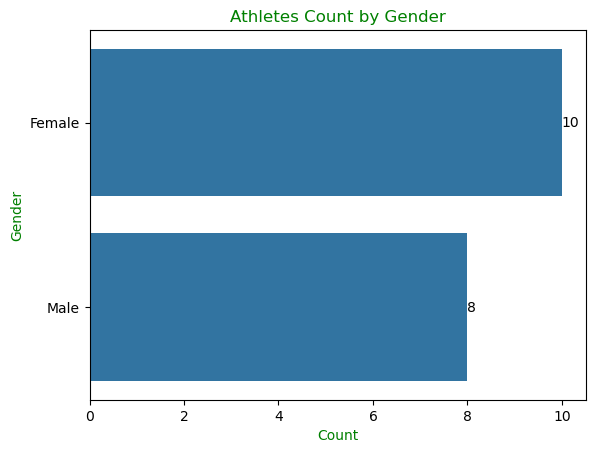

In [153]:
ax=sns.countplot(Athletes['Gender'])
ax.bar_label(ax.containers[0])
plt.title('Athletes Count by Gender',fontsize=12,color='green')
plt.ylabel('Gender',fontsize=10,color='green')
plt.xlabel('Count',fontsize=10,color='green')

In [201]:
#Triathlon dataframe
print(Triathlon)
avgTriathlon=Triathlon['HRV'].mean()
print('The average HRV of the triathletes is: ',round(avgTriathlon,2))

      ID     time     RR       VO2  power         HR
0     17 -182.408  736.0  0.363762      0   8.152174
1     17 -181.672  736.0  0.363762      0   8.152174
2     17 -180.968  704.0  0.363762      0   8.522727
3     17 -180.268  700.0  0.363762      0   8.571429
4     17 -179.616  652.0  0.363762      0   9.202454
...   ..      ...    ...       ...    ...        ...
4976  18  947.288  536.0  0.507071      0  11.194030
4977  18  947.816  528.0  0.507071      0  11.363636
4978  18  948.344  528.0  0.507071      0  11.363636
4979  18  948.884  540.0  0.507071      0  11.111111
4980  18  949.424  540.0  0.507071      0  11.111111

[4981 rows x 6 columns]


KeyError: 'HRV'

In [217]:
print(df_excersizetype)
avg(df_excersizetype)==(df_excersizetype['HR'].avg())
print('The average HR of the AllAthletes is: ',round(avg(df_excersizetype),2))

       ID     time     RR       VO2  power     ExType          HR Zone Type
0       1 -130.840  672.0  0.302008      0    Warm Up   89.285714    Zone 1
1       1 -130.168  672.0  0.302008      0    Warm Up   89.285714    Zone 1
2       1 -129.536  632.0  0.301336      0    Warm Up   94.936709    Zone 1
3       1 -128.824  712.0  0.301336      0    Warm Up   84.269663    Zone 1
4       1 -127.948  876.0  0.301336      0    Warm Up   68.493151    Zone 1
...    ..      ...    ...       ...    ...        ...         ...       ...
52057  18  947.288  536.0  0.507071      0  Cool Down  111.940299    Zone 2
52058  18  947.816  528.0  0.507071      0  Cool Down  113.636364    Zone 2
52059  18  948.344  528.0  0.507071      0  Cool Down  113.636364    Zone 2
52060  18  948.884  540.0  0.507071      0  Cool Down  111.111111    Zone 2
52061  18  949.424  540.0  0.507071      0  Cool Down  111.111111    Zone 2

[52062 rows x 8 columns]


NameError: name 'avg' is not defined